In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import latexStrings as ls
import mca

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import statsmodels.api as sm

%matplotlib qt5

In [2]:
data = pd.read_csv("data/heart.data").dropna()
data.index = range(data.shape[0])
# 297 observaciones despues de quitar nan

In [3]:
data.rename(columns = {"target":"diagnosis", "cp": "chest_pain", "trestbps": "rest_bp",
                      "restecg":"rest_ecg"}, inplace = True)

In [4]:
data.head()

,age,sex,chest_pain,rest_bp,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
age           297 non-null float64
sex           297 non-null float64
chest_pain    297 non-null float64
rest_bp       297 non-null float64
chol          297 non-null float64
fbs           297 non-null float64
rest_ecg      297 non-null float64
thalach       297 non-null float64
exang         297 non-null float64
oldpeak       297 non-null float64
slope         297 non-null float64
ca            297 non-null float64
thal          297 non-null float64
diagnosis     297 non-null int64
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


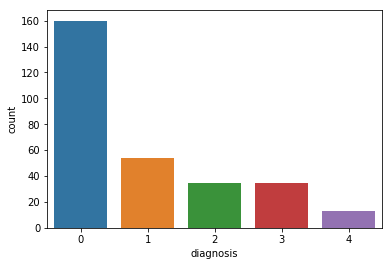

In [6]:
sns.countplot(x = "diagnosis", data = data)

In [7]:
# Diccionarios con los nombres de categorias
sex_cat = {0 : "female", 
           1 : "male"}

chest_pain_cat = {1 : "typical angina", 
                  2 : "atypical angina",
                  3 : "non-anginal pain",
                  4 : "asymptomatic"}

# Fasting blood sugar
fbs_cat = {0 : "<= 120mg/dl",
       1 : "> 120mg/dl"}

# Rersting ECG
rest_ecg = {0 : "normal",
            1 : "ST-T wave abnormality",
            2 : "probable left ventricular hypertrophy"}

# Excercise induced angina
exang = {0 : "no",
         1 : "yes"}

# slope of peak excersice ST segment
slope = {1 : "upsloping",
         2 : "flat",
         3 : "downsloping"}

# https://www.medilexicon.com/dictionary/72223
thal = {3 : "normal",
        6 : "fixed defect",
        7 : "reversable defect"}

In [8]:
# Juntar los valores 1, 2, 3, 4 de diagnosis al nuevo valor 1 (para q diagnosis sea v o f)
data["diagnosis"] = np.where(data["diagnosis"] > 0, 1, 0)
data.head()

,age,sex,chest_pain,rest_bp,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
# Indices de vars categoricas y vars de razon
# ca (11) es categorica? numero de vessels iluminados en fluroscopia
cat_index = [0,1, 2, 5, 6, 8, 10, 11, 12]
num_index = [3, 4, 7, 9]
data.iloc[:, cat_index].head()

,age,sex,chest_pain,fbs,rest_ecg,exang,slope,ca,thal
0,63.0,1.0,1.0,1.0,2.0,0.0,3.0,0.0,6.0
1,67.0,1.0,4.0,0.0,2.0,1.0,2.0,3.0,3.0
2,67.0,1.0,4.0,0.0,2.0,1.0,2.0,2.0,7.0
3,37.0,1.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0
4,41.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,3.0


In [10]:
data.iloc[:, num_index].head()

,rest_bp,chol,thalach,oldpeak
0,145.0,233.0,150.0,2.3
1,160.0,286.0,108.0,1.5
2,120.0,229.0,129.0,2.6
3,130.0,250.0,187.0,3.5
4,130.0,204.0,172.0,1.4


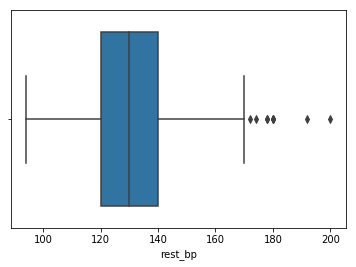

In [11]:
sns.boxplot(x = 'rest_bp', data = data)

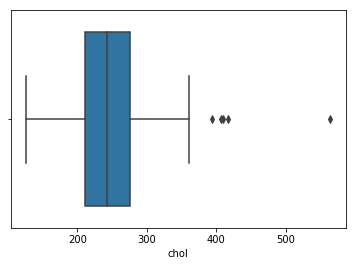

In [12]:
sns.boxplot(x = 'chol', data = data)

In [13]:
max(data['chol'])

564.0

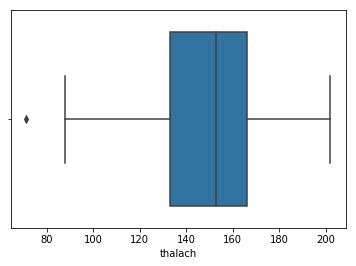

In [14]:
sns.boxplot(x = 'thalach', data = data)

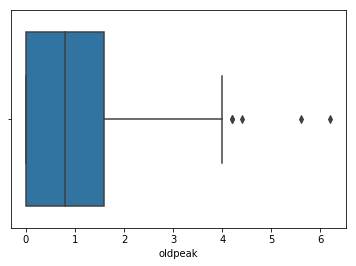

In [15]:
sns.boxplot(x = 'oldpeak', data = data)

In [16]:
max(data['oldpeak'])

6.2

In [17]:
X_num = data.iloc[:, num_index]
X_num_std = pd.DataFrame()

In [18]:
for col in X_num.columns:
    X_num_std[col] = preprocessing.scale(X_num[col])

In [19]:
X_num_std.head()

,rest_bp,chol,thalach,oldpeak
0,0.750380,-0.276443,0.017494,1.068965
1,1.596266,0.744555,-1.816334,0.381773
2,-0.659431,-0.353500,-0.899420,1.326662
3,-0.095506,0.051047,1.633010,2.099753
4,-0.095506,-0.835103,0.978071,0.295874


In [20]:
processed_data = X_num_std.join(data.iloc[:, cat_index])

### EDA

In [21]:
index = num_index.copy()
index.append(0)

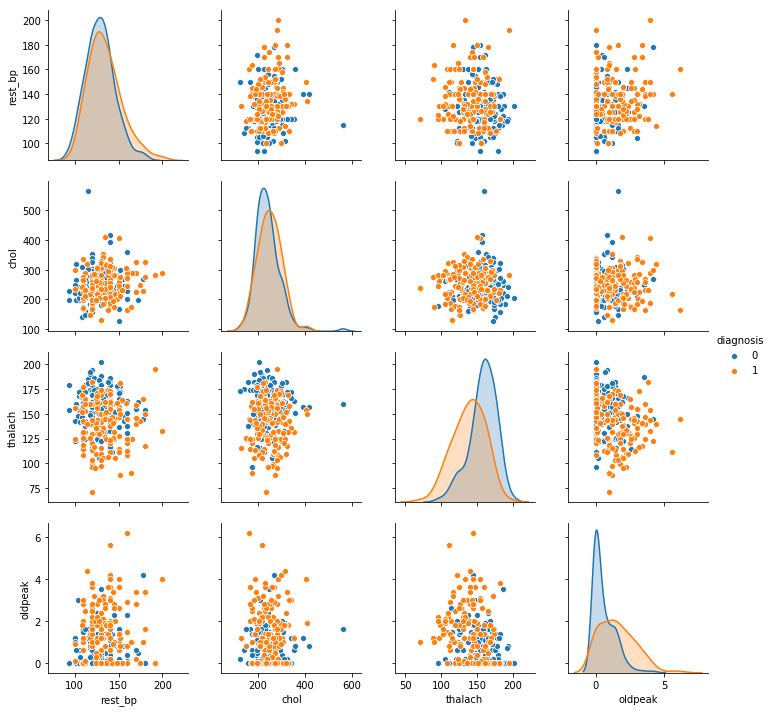

In [22]:
# histogramas para vars 
sns.pairplot(data, vars = data.columns[num_index], hue = "diagnosis")
plt.show()

In [23]:
processed_data['diagnosis'] = data['diagnosis']

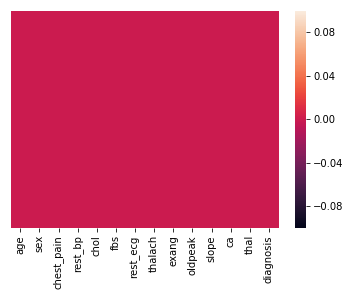

In [24]:
sns.heatmap(data=data.isnull(),yticklabels=False)

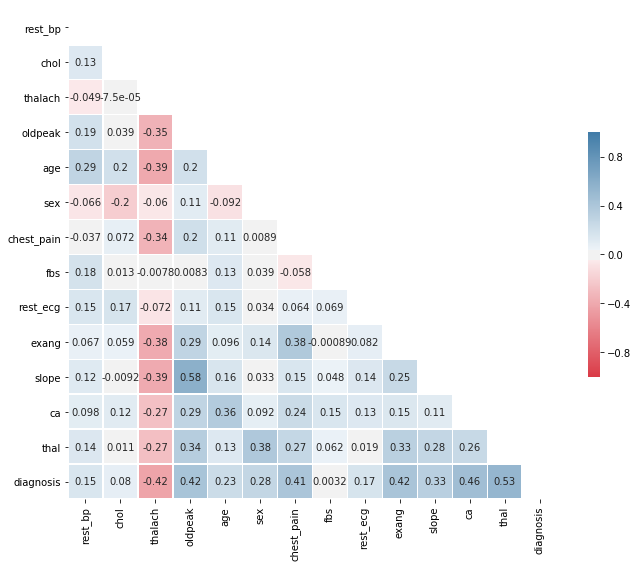

In [25]:
# Correlaciones
corr = processed_data.corr()

# plot correlation matrix
fig = plt.figure(figsize=(11, 9))
mask = np.zeros_like(corr, dtype=np.bool) # create mask to cover the upper triangle
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 240, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin = -1, vmax = 1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
#plt.savefig('graphs/correlaciones.png', dpi = 300)

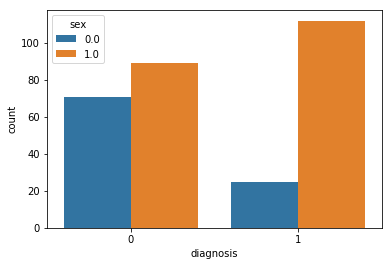

In [26]:
sns.countplot(x="diagnosis", data=processed_data, hue='sex')

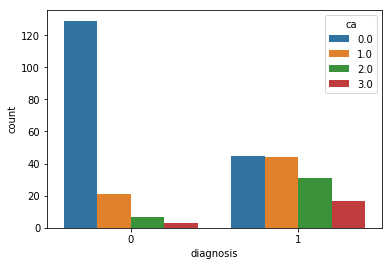

In [27]:
sns.countplot(x="diagnosis", data=processed_data, hue='ca')

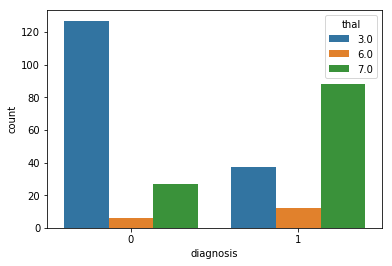

In [28]:
sns.countplot(x="diagnosis", data=processed_data, hue='thal')

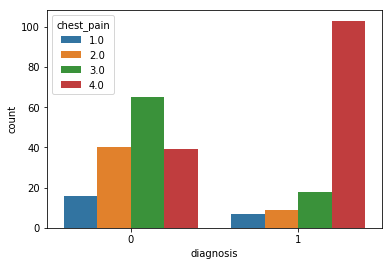

In [29]:
sns.countplot(x="diagnosis", data=processed_data, hue='chest_pain')

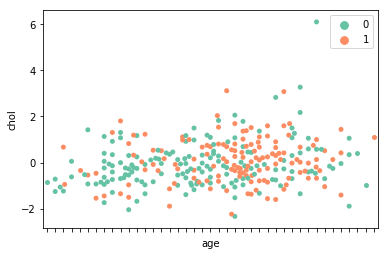

In [30]:
swarmPlot = sns.swarmplot(x = 'age', y = 'chol', data=processed_data, hue='diagnosis', palette='Set2')
swarmPlot.set(xticklabels=[])
swarmPlot.legend(loc='upper right')

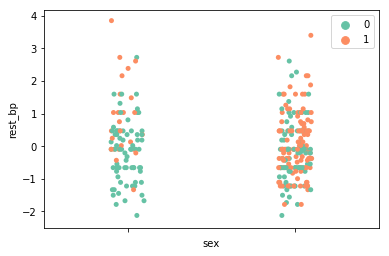

In [31]:
swarmPlot = sns.stripplot(x = 'sex', y = 'rest_bp', data=processed_data, hue='diagnosis', palette='Set2')
swarmPlot.set(xticklabels=[])
swarmPlot.legend(loc='upper right')

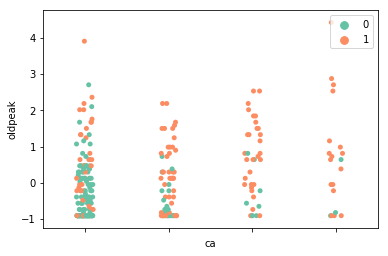

In [32]:
swarmPlot = sns.stripplot(x = 'ca', y = 'oldpeak', data=processed_data, hue='diagnosis', palette='Set2')
swarmPlot.set(xticklabels=[])
swarmPlot.legend(loc='upper right')

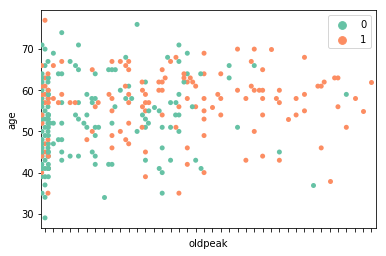

In [33]:
swarmPlot = sns.swarmplot(x = 'oldpeak', y = 'age', data=processed_data, hue='diagnosis', palette='Set2')
swarmPlot.set(xticklabels=[])
swarmPlot.legend(loc='upper right')

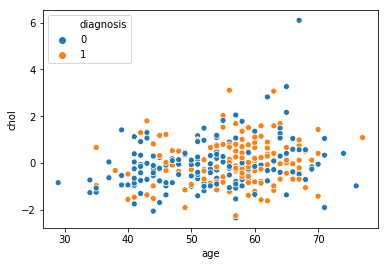

In [34]:
sns.scatterplot(x = 'age', y = 'chol', data = processed_data, hue = 'diagnosis')

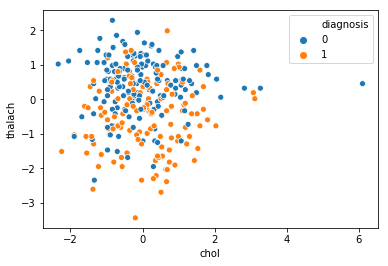

In [35]:
sns.scatterplot(x = 'chol', y = 'thalach', data = processed_data, hue = 'diagnosis')

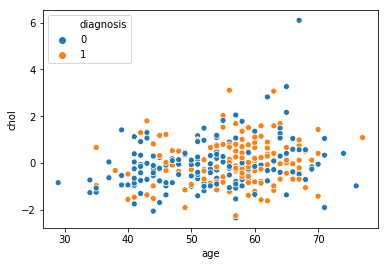

In [36]:
sns.scatterplot(x = 'age', y = 'chol', data = processed_data, hue = 'diagnosis')

### Clusters

In [37]:
from sklearn.cluster import KMeans


In [38]:
kmeans = KMeans(n_clusters=3)


In [39]:
cluster_data = data[data['diagnosis']==1][['sex','chol']]

In [40]:
kmeans.fit(cluster_data)
cluster_data['labels'] = kmeans.labels_
cluster_data.head()

,sex,chol,labels
1,1.0,286.0,1
2,1.0,229.0,0
6,0.0,268.0,0
8,1.0,254.0,0
9,1.0,203.0,2


[[]]

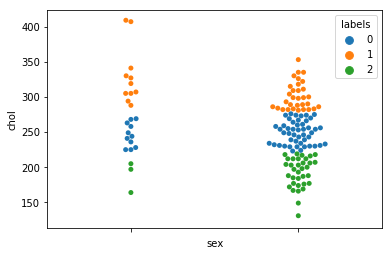

In [41]:
swarmPlot =  sns.swarmplot(x="sex", y="chol", data=cluster_data, hue='labels')
swarmPlot.set(xticklabels=[])

### Dummy var

In [42]:
X = processed_data.drop(columns = ['diagnosis'])
y = processed_data['diagnosis']

In [43]:
X['sex'] = processed_data['sex'].map(sex_cat)
X['chest_pain'] = processed_data['chest_pain'].map(chest_pain_cat)
X['rest_ecg'] = processed_data['rest_ecg'].map(rest_ecg)
#X['fbs'] = data['fbs'].map(fbs_cat)
X['exang'] = processed_data['exang'].map(exang)
X['slope'] = processed_data['slope'].map(slope)
X['thal'] = processed_data['thal'].map(thal)

In [44]:
X.isnull().sum()

rest_bp       0
chol          0
thalach       0
oldpeak       0
age           0
sex           0
chest_pain    0
fbs           0
rest_ecg      0
exang         0
slope         0
ca            0
thal          0
dtype: int64

In [45]:
X = pd.get_dummies(X, columns =['sex', 'chest_pain','rest_ecg','fbs','exang','slope','thal','ca'], 
                   prefix = ['is','has','ecg','fbs','exang','slope','thal','ca'],drop_first = True)



In [46]:
X.head()

,rest_bp,chol,thalach,oldpeak,age,is_male,has_atypical angina,has_non-anginal pain,has_typical angina,ecg_normal,ecg_probable left ventricular hypertrophy,fbs_1.0,exang_yes,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,ca_1.0,ca_2.0,ca_3.0
0,0.750380,-0.276443,0.017494,1.068965,63.0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0
1,1.596266,0.744555,-1.816334,0.381773,67.0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,1
2,-0.659431,-0.353500,-0.899420,1.326662,67.0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0
3,-0.095506,0.051047,1.633010,2.099753,37.0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0
4,-0.095506,-0.835103,0.978071,0.295874,41.0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0


### Logit simple

In [47]:
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 158999)

In [48]:
len(y_train)

237

In [49]:
len(y_test)

60

In [50]:
logit = sm.Logit(y_train,X_train1)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.305775
         Iterations 8


In [51]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  237
Model:                          Logit   Df Residuals:                      217
Method:                           MLE   Df Model:                           19
Date:                Tue, 07 May 2019   Pseudo R-squ.:                  0.5540
Time:                        15:57:06   Log-Likelihood:                -72.469
converged:                       True   LL-Null:                       -162.50
                                        LLR p-value:                 3.015e-28
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
rest_bp                                       0.5894      0.242      2.435      0.015       0.115       1.064
chol                                          0.0886      0.247      0.358      0.720      -0.396       0.573
thalach                                      -0.5857      0.325     -1.800      0.072      -1.223       0.052
oldpeak                                       0.5937      0.320      1.855      0.064      -0.034       1.221
age                                          -0.0235      0.023     -1.001      0.317      -0.069       0.022
is_male                                       1.9918      0.659      3.023      0.003       0.700       3.283
has_atypical angina                          -0.6199      0.643     -0.964      0.335      -1.880       0.640
has_non-anginal pain                         -1.6751      0.582     -2.876      0.004      -2.817      -0.534
has_typical angina                           -2.6572      0.837     -3.176      0.001      -4.297      -1.017
ecg_normal                                   -1.5957      1.535     -1.039      0.299      -4.605       1.414
ecg_probable left ventricular hypertrophy    -0.9724      1.566     -0.621      0.535      -4.041       2.096
fbs_1.0                                      -0.6941      0.724     -0.959      0.337      -2.112       0.724
exang_yes                                     0.7051      0.510      1.383      0.167      -0.294       1.704
slope_flat                                    0.7564      0.919      0.823      0.411      -1.045       2.558
slope_upsloping                              -0.2576      1.015     -0.254      0.800      -2.247       1.732
thal_normal                                  -0.0136      0.949     -0.014      0.989      -1.873       1.845
thal_reversable defect                        1.0571      0.895      1.181      0.237      -0.697       2.811
ca_1.0                                        2.3502      0.596      3.943      0.000       1.182       3.519
ca_2.0                                        3.4254      0.825      4.152      0.000       1.808       5.042
ca_3.0                                        2.0346      0.979      2.078      0.038       0.116       3.953
=============================================================================================================
"""

In [52]:
X_train2 = X_train1.drop(columns = ['age','chol', 'slope_flat', 'slope_upsloping',
                                     'ecg_normal','ecg_probable left ventricular hypertrophy',
                                   'fbs_1.0','exang_yes'])

In [53]:
X_train2.head()

,rest_bp,thalach,oldpeak,is_male,has_atypical angina,has_non-anginal pain,has_typical angina,thal_normal,thal_reversable defect,ca_1.0,ca_2.0,ca_3.0
159,-1.730887,0.279470,-0.906712,1,1,0,0,0,1,0,0,0
200,0.468418,-0.724769,-0.734914,0,0,1,0,0,1,0,0,0
115,0.468418,0.672433,-0.906712,1,0,1,0,1,0,0,0,0
21,1.032342,0.541445,-0.047722,0,0,0,1,1,0,0,0,0
145,1.878229,-1.117733,-0.047722,1,0,0,0,0,1,0,0,1


In [54]:
logit2 = sm.Logit(y_train,X_train2)
logit_model2 = logit2.fit()

Optimization terminated successfully.
         Current function value: 0.333898
         Iterations 7


In [55]:
logit_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  237
Model:                          Logit   Df Residuals:                      225
Method:                           MLE   Df Model:                           11
Date:                Tue, 07 May 2019   Pseudo R-squ.:                  0.5130
Time:                        15:57:06   Log-Likelihood:                -79.134
converged:                       True   LL-Null:                       -162.50
                                        LLR p-value:                 5.560e-30
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
rest_bp                    0.4852      0.214      2.263      0.024       0.065       0.905
thalach                   -0.6004      0.256     -2.349      0.019      -1.101      -0.100
oldpeak                    0.7549      0.276      2.735      0.006       0.214       1.296
is_male                    1.2101      0.460      2.632      0.008       0.309       2.111
has_atypical angina       -1.1584      0.587     -1.972      0.049      -2.310      -0.007
has_non-anginal pain      -1.9556      0.524     -3.735      0.000      -2.982      -0.929
has_typical angina        -2.6056      0.757     -3.441      0.001      -4.090      -1.121
thal_normal               -1.4145      0.453     -3.124      0.002      -2.302      -0.527
thal_reversable defect    -0.1574      0.546     -0.289      0.773      -1.227       0.912
ca_1.0                     2.0202      0.535      3.773      0.000       0.971       3.070
ca_2.0                     2.4579      0.671      3.665      0.000       1.143       3.772
ca_3.0                     1.5081      0.909      1.659      0.097      -0.273       3.290
==========================================================================================
"""

In [56]:
logmodel = LogisticRegression(class_weight = "balanced")
logmodel.fit(X_train1,y_train)

D:\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

### LDA

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 158999)

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [59]:
lda_test = LinearDiscriminantAnalysis(n_components=4)

In [60]:
X_lda_train = lda_test.fit_transform(X_train, y_train)
X_lda_test = lda_test.transform(X_test)

In [61]:
lda_logit = sm.Logit(y_train,X_lda_train)
lda_logit_model = lda_logit.fit()

lda_logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.314862
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  237
Model:                          Logit   Df Residuals:                      236
Method:                           MLE   Df Model:                            0
Date:                Tue, 07 May 2019   Pseudo R-squ.:                  0.5408
Time:                        15:57:06   Log-Likelihood:                -74.622
converged:                       True   LL-Null:                       -162.50
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0295      0.253      8.025      0.000       1.534       2.525
==============================================================================
"""

In [62]:
log_lda_model = LogisticRegression(class_weight = "balanced")
log_lda_model.fit(X_lda_train,y_train)
predictions_lda = log_lda_model.predict(X_lda_test)
print('LDA with Components =', 2)
print(classification_report(y_test,predictions_lda))

LDA with Components = 2


D:\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


NameError: name 'classification_report' is not defined

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

### MCA

In [64]:
# Tablas de contingencia de diagnosis vs vars categoricas
for att in data.columns[cat_index]:
    M = []
    print("Var = " + att )
    vals = np.unique(data[att]).astype(int)
    for val in vals:
        M.append([data.query(att + " == " + str(val) + " and diagnosis == 0").shape[0], 
                  data.query(att + " == " + str(val) + " and diagnosis == 1").shape[0]])
    print("Matriz de Contingencia: ")
    print(ls.indexedMatrix(np.array(M, dtype = int).T, ['0', '1'], vals), '\n')

Var = age
Matriz de Contingencia: 
\begin{blockarray}{cccccccccccccccccccccccccccccccccccccccccc}
 & 29 & 34 & 35 & 37 & 38 & 39 & 40 & 41 & 42 & 43 & 44 & 45 & 46 & 47 & 48 & 49 & 50 & 51 & 52 & 53 & 54 & 55 & 56 & 57 & 58 & 59 & 60 & 61 & 62 & 63 & 64 & 65 & 66 & 67 & 68 & 69 & 70 & 71 & 74 & 76 & 77
\begin{block}{c(ccccccccccccccccccccccccccccccccccccccccc)}
0 & 1 & 2 & 2 & 2 & 0 & 3 & 1 & 9 & 7 & 5 & 8 & 6 & 4 & 3 & 4 & 3 & 4 & 9 & 8 & 5 & 10 & 3 & 5 & 7 & 6 & 5 & 3 & 1 & 4 & 3 & 6 & 4 & 4 & 3 & 2 & 2 & 1 & 3 & 1 & 1 & 0 \\ 
1 & 0 & 0 & 2 & 0 & 1 & 1 & 2 & 1 & 1 & 2 & 3 & 2 & 3 & 2 & 3 & 2 & 3 & 3 & 3 & 2 & 6 & 5 & 6 & 10 & 12 & 9 & 9 & 7 & 7 & 6 & 4 & 4 & 3 & 6 & 2 & 1 & 3 & 0 & 0 & 0 & 1 \\ 
\end{block}
\end{blockarray} 

Var = sex
Matriz de Contingencia: 
\begin{blockarray}{ccc}
 & 0 & 1
\begin{block}{c(cc)}
0 & 71 & 89 \\ 
1 & 25 & 112 \\ 
\end{block}
\end{blockarray} 

Var = chest_pain
Matriz de Contingencia: 
\begin{blockarray}{ccccc}
 & 1 & 2 & 3 & 4
\begin{block}{c(cccc)}
0

In [65]:
# MCA
labels = ['sex', 'chest_pain', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal']
mca_ben = mca.MCA(data, cols = labels)

In [66]:
mca_ben.L

array([0.03560743, 0.00199655, 0.00141772, 0.00046124, 0.00023844])

In [67]:
np.sum(mca_ben.L)

0.039721378509345255

In [68]:
exp_var = mca_ben.expl_var(greenacre=True, N=5)
exp_var

array([0.70934877, 0.03977402, 0.02824292, 0.00918853, 0.00474995])

In [69]:
np.sum(exp_var)

0.7913041987732712

In [70]:
multi = [[], []]
for l in labels:
    for val in np.unique(data[l]).astype(int):
        multi[0] += [l]
        multi[1] += [str(val)]

mca_c_df = pd.DataFrame(data = mca_ben.fs_c(N=5), columns = ["Factor 1", "Factor 2", "Factor 3", "Factor 4", "Factor 5"],
                        index = multi)
mca_c_df

Factor 1  Factor 2  Factor 3  Factor 4  Factor 5
sex        0 -0.201002  0.030414  0.078426 -0.021534 -0.022564
           1  0.096001 -0.014526 -0.037457  0.010285  0.010777
chest_pain 1 -0.017422 -0.182367 -0.068036 -0.043623  0.003457
           2 -0.347495  0.014910 -0.048723 -0.033033  0.027892
           3 -0.214006 -0.013944  0.030260  0.057883 -0.016284
           4  0.247820  0.032543  0.010146 -0.015369 -0.000667
fbs        0 -0.012846  0.027544  0.002278 -0.005175  0.006918
           1  0.075880 -0.162704 -0.013458  0.030570 -0.040866
rest_ecg   0 -0.094105  0.026514 -0.024055  0.001851  0.010439
           1  0.262997  0.018675  0.530828 -0.010281  0.114168
           2  0.087544 -0.027208  0.009677 -0.001582 -0.013639
exang      0 -0.164206 -0.019440 -0.000668  0.003749 -0.000972
           1  0.338568  0.040083  0.001376 -0.007730  0.002003
slope      1 -0.210826  0.007602 -0.036985  0.001844 -0.001525
           2  0.188908  0.022850  0.029409 -0.001903 -0.007310
           3  0.163072 -0.199383  0.052944  0.000208  0.057778
ca         0 -0.148325 -0.007602  0.004356 -0.007694  0.012810
           1  0.146306  0.062595 -0.025086  0.044939 -0.006077
           2  0.262203 -0.038950 -0.030460 -0.081223 -0.051627
           3  0.316745 -0.063290  0.101502  0.075206  0.006392
thal       3 -0.229768  0.004765  0.019351 -0.006825 -0.006832
           6  0.362124 -0.171315  0.063052 -0.035949  0.043818
           7  0.270988  0.020020 -0.037465  0.015360  0.002885

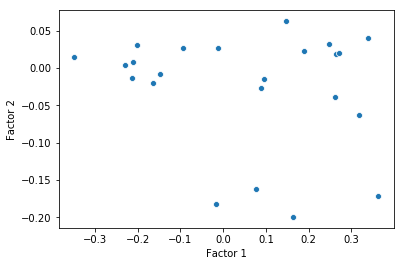

In [71]:
# plot columnas
# mayb hacer un mejor plot, dando figura a cada atributo y diferentes colores por valor
sns.scatterplot(x = "Factor 1", y = "Factor 2", data = mca_c_df)
plt.show()

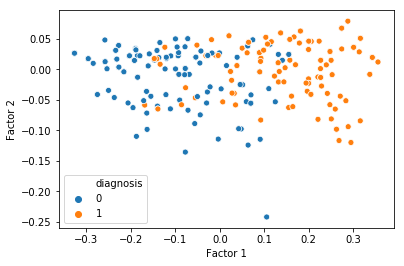

In [72]:
mca_r_df = pd.DataFrame(data = mca_ben.fs_r(N=5), columns = ["Factor 1", "Factor 2", "Factor 3", "Factor 4", "Factor 5"])

mca_r_df["diagnosis"] = data["diagnosis"]
mca_r_df

# plot de renglones
sns.scatterplot(x = "Factor 1", y = "Factor 2", data = mca_r_df, hue = "diagnosis")
plt.show()

## Sets de entrenamiento

In [73]:
# Escoger 238 (80 %) de las observaciones para el conjunto de entrenamiento
np.random.seed(155766)
train_rows = np.sort(np.random.choice(X.index, 238, replace = False))
X_train = X.iloc[train_rows, :]
train_diagnosis = data.iloc[train_rows, 13].values
X_test = X.drop(train_rows)
test_diagnosis = data.drop(train_rows)["diagnosis"].values

In [74]:
X_train

,rest_bp,chol,thalach,oldpeak,age,is_male,has_atypical angina,has_non-anginal pain,has_typical angina,ecg_normal,ecg_probable left ventricular hypertrophy,fbs_1.0,exang_yes,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,ca_1.0,ca_2.0,ca_3.0
0,0.750380,-0.276443,0.017494,1.068965,63.0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0
1,1.596266,0.744555,-1.816334,0.381773,67.0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,1
2,-0.659431,-0.353500,-0.899420,1.326662,67.0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0
3,-0.095506,0.051047,1.633010,2.099753,37.0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0
4,-0.095506,-0.835103,0.978071,0.295874,41.0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
5,-0.659431,-0.218651,1.240047,-0.219520,56.0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0
6,0.468418,0.397801,0.454120,2.185652,62.0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
7,-0.659431,2.054515,0.585108,-0.391318,57.0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0
10,0.468418,-1.066272,-0.069831,-0.563116,57.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
11,0.468418,0.898668,0.148482,0.209975,56.0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0


In [75]:
X_test

,rest_bp,chol,thalach,oldpeak,age,is_male,has_atypical angina,has_non-anginal pain,has_typical angina,ecg_normal,ecg_probable left ventricular hypertrophy,fbs_1.0,exang_yes,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,ca_1.0,ca_2.0,ca_3.0
8,-0.095506,0.128103,-0.113493,0.295874,63.0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0
9,0.468418,-0.854367,0.235807,1.756157,53.0,1,0,0,0,0,1,1,1,0,0,0,1,0,0,0
14,2.272976,-0.931424,0.541445,-0.477217,52.0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
18,-0.095506,0.532650,-0.462794,-0.734914,48.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0
23,0.017278,-0.449820,1.021734,1.842056,58.0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0
26,-0.659431,1.784818,0.978071,-0.906712,58.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0
29,-1.223355,-1.547875,-1.554358,0.811268,40.0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0
31,-0.828608,-0.334236,0.454120,0.295874,60.0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0
34,-0.095506,-0.276443,1.283709,-0.563116,44.0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0
42,1.596266,1.052781,0.541445,-0.563116,71.0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0


## PCA

In [76]:
# Reducir el dataset a las columnas numericas
X_numerical_train = X_train.iloc[:, 0:4]
X_numerical_test = X_test.iloc[:, 0:4]
X_numerical_train.head(), X_numerical_test.head()

(    rest_bp      chol   thalach   oldpeak
 0  0.750380 -0.276443  0.017494  1.068965
 1  1.596266  0.744555 -1.816334  0.381773
 2 -0.659431 -0.353500 -0.899420  1.326662
 3 -0.095506  0.051047  1.633010  2.099753
 4 -0.095506 -0.835103  0.978071  0.295874,
      rest_bp      chol   thalach   oldpeak
 8  -0.095506  0.128103 -0.113493  0.295874
 9   0.468418 -0.854367  0.235807  1.756157
 14  2.272976 -0.931424  0.541445 -0.477217
 18 -0.095506  0.532650 -0.462794 -0.734914
 23  0.017278 -0.449820  1.021734  1.842056)

In [77]:
# PCA
pca = PCA(n_components=4, random_state=155766)
pca.fit(X_numerical_train)
cols = ["c1", "c2", "c3", "c4"]

pca_df_train = pd.DataFrame(pca.transform(X_numerical_train), columns = cols, index = X_numerical_train.index)
pca_df_train["diagnosis"] = train_diagnosis

pca_df_test = pd.DataFrame(pca.transform(X_numerical_test), columns = cols, index = X_numerical_test.index)
pca_df_test["diagnosis"] = test_diagnosis

In [78]:
pca_df_train.head()

,c1,c2,c3,c4,diagnosis
0,0.882506,0.172521,-0.755519,0.524398,0
1,1.964839,0.709921,0.054671,-1.340132,1
2,1.074477,-1.160380,0.285721,0.579057,1
3,0.348097,0.394323,-0.525891,2.551136,0
4,-0.622479,-0.248546,-0.883318,0.823383,0


In [79]:
#Dataframe con vars de prueba, para uso futuro
pca_df_test.head()

,c1,c2,c3,c4,diagnosis
8,0.163007,-0.056539,0.141431,0.178936,1
9,1.044014,-0.373424,-1.118085,1.215626,1
14,-0.018675,1.081964,-2.215033,-0.757439,0
18,-0.285962,0.184904,0.604889,-0.755693,0
23,0.514176,-0.082103,-0.774857,1.928958,1


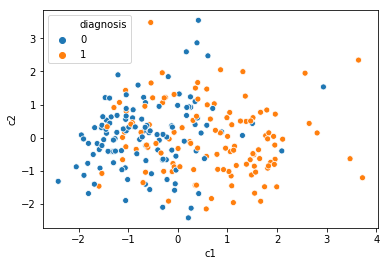

In [80]:
sns.scatterplot(x = "c1", y = "c2", data = pca_df_train, hue = "diagnosis")
plt.show()

In [81]:
pca.explained_variance_ratio_

array([0.35628017, 0.26271585, 0.22156985, 0.15943413])

## Logit

In [82]:
logit = sm.Logit(train_diagnosis, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.296400
         Iterations 8


In [83]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  238
Model:                          Logit   Df Residuals:                      218
Method:                           MLE   Df Model:                           19
Date:                Tue, 07 May 2019   Pseudo R-squ.:                  0.5724
Time:                        15:57:38   Log-Likelihood:                -70.543
converged:                       True   LL-Null:                       -164.97
                                        LLR p-value:                 5.540e-30
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
rest_bp                                       0.6051      0.246      2.458      0.014       0.123       1.087
chol                                          0.3654      0.240      1.525      0.127      -0.104       0.835
thalach                                      -0.6164      0.308     -1.999      0.046      -1.221      -0.012
oldpeak                                       0.4011      0.317      1.266      0.205      -0.220       1.022
age                                          -0.0202      0.027     -0.743      0.458      -0.073       0.033
is_male                                       1.5656      0.610      2.568      0.010       0.371       2.761
has_atypical angina                          -0.2618      0.643     -0.407      0.684      -1.521       0.998
has_non-anginal pain                         -2.2021      0.631     -3.488      0.000      -3.439      -0.965
has_typical angina                           -2.2088      0.821     -2.691      0.007      -3.817      -0.600
ecg_normal                                   -1.9750      2.146     -0.920      0.357      -6.180       2.230
ecg_probable left ventricular hypertrophy    -1.4967      2.171     -0.690      0.490      -5.751       2.758
fbs_1.0                                      -0.4277      0.693     -0.617      0.537      -1.785       0.930
exang_yes                                     0.9159      0.497      1.842      0.066      -0.059       1.891
slope_flat                                    0.9691      1.192      0.813      0.416      -1.368       3.306
slope_upsloping                              -0.3160      1.276     -0.248      0.804      -2.817       2.185
thal_normal                                   0.3137      1.013      0.310      0.757      -1.672       2.299
thal_reversable defect                        2.0124      1.010      1.992      0.046       0.033       3.992
ca_1.0                                        2.3701      0.626      3.788      0.000       1.144       3.596
ca_2.0                                        3.3831      0.913      3.703      0.000       1.593       5.173
ca_3.0                                        1.5933      0.952      1.673      0.094      -0.273       3.460
=============================================================================================================
"""

In [84]:
X_train2 = X_train.drop(columns = ['age','chol', 'slope_flat', 'slope_upsloping',
                                     'ecg_normal','ecg_probable left ventricular hypertrophy',
                                   'fbs_1.0','exang_yes'])

In [85]:
X_train2.head()

,rest_bp,thalach,oldpeak,is_male,has_atypical angina,has_non-anginal pain,has_typical angina,thal_normal,thal_reversable defect,ca_1.0,ca_2.0,ca_3.0
0,0.750380,0.017494,1.068965,1,0,0,1,0,0,0,0,0
1,1.596266,-1.816334,0.381773,1,0,0,0,1,0,0,0,1
2,-0.659431,-0.899420,1.326662,1,0,0,0,0,1,0,1,0
3,-0.095506,1.633010,2.099753,1,0,1,0,1,0,0,0,0
4,-0.095506,0.978071,0.295874,0,1,0,0,1,0,0,0,0


In [86]:
logit2 = sm.Logit(train_diagnosis,X_train2)
logit_model2 = logit2.fit()

Optimization terminated successfully.
         Current function value: 0.334545
         Iterations 7


In [87]:
logit_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  238
Model:                          Logit   Df Residuals:                      226
Method:                           MLE   Df Model:                           11
Date:                Tue, 07 May 2019   Pseudo R-squ.:                  0.5174
Time:                        15:57:39   Log-Likelihood:                -79.622
converged:                       True   LL-Null:                       -164.97
                                        LLR p-value:                 8.489e-31
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
rest_bp                    0.4749      0.213      2.226      0.026       0.057       0.893
thalach                   -0.6225      0.246     -2.533      0.011      -1.104      -0.141
oldpeak                    0.6901      0.279      2.473      0.013       0.143       1.237
is_male                    0.6667      0.442      1.509      0.131      -0.199       1.533
has_atypical angina       -0.7966      0.576     -1.383      0.167      -1.926       0.332
has_non-anginal pain      -2.4158      0.563     -4.294      0.000      -3.519      -1.313
has_typical angina        -2.3303      0.730     -3.194      0.001      -3.760      -0.900
thal_normal               -1.1034      0.405     -2.727      0.006      -1.896      -0.310
thal_reversable defect     0.7714      0.517      1.493      0.135      -0.241       1.784
ca_1.0                     2.0827      0.539      3.866      0.000       1.027       3.138
ca_2.0                     2.5819      0.759      3.401      0.001       1.094       4.070
ca_3.0                     1.3313      0.884      1.505      0.132      -0.402       3.065
==========================================================================================
"""

In [88]:
logmodel = LogisticRegression(solver = "liblinear", class_weight = "balanced")
logmodel.fit(X_train1,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Logit utilizando pca

In [89]:
log_df_train = X_train.iloc[:, 4:].join(pca_df_train)
log_df_test = X_test.iloc[:, 4:].join(pca_df_test)

In [90]:
log_df_train.head()

,age,is_male,has_atypical angina,has_non-anginal pain,has_typical angina,ecg_normal,ecg_probable left ventricular hypertrophy,fbs_1.0,exang_yes,slope_flat,...,thal_normal,thal_reversable defect,ca_1.0,ca_2.0,ca_3.0,c1,c2,c3,c4,diagnosis
0,63.0,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0.882506,0.172521,-0.755519,0.524398,0
1,67.0,1,0,0,0,0,1,0,1,1,...,1,0,0,0,1,1.964839,0.709921,0.054671,-1.340132,1
2,67.0,1,0,0,0,0,1,0,1,1,...,0,1,0,1,0,1.074477,-1.160380,0.285721,0.579057,1
3,37.0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0.348097,0.394323,-0.525891,2.551136,0
4,41.0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,-0.622479,-0.248546,-0.883318,0.823383,0


In [91]:
log_df_test.head()

,age,is_male,has_atypical angina,has_non-anginal pain,has_typical angina,ecg_normal,ecg_probable left ventricular hypertrophy,fbs_1.0,exang_yes,slope_flat,...,thal_normal,thal_reversable defect,ca_1.0,ca_2.0,ca_3.0,c1,c2,c3,c4,diagnosis
8,63.0,1,0,0,0,0,1,0,0,1,...,0,1,1,0,0,0.163007,-0.056539,0.141431,0.178936,1
9,53.0,1,0,0,0,0,1,1,1,0,...,0,1,0,0,0,1.044014,-0.373424,-1.118085,1.215626,1
14,52.0,1,0,1,0,1,0,1,0,0,...,0,1,0,0,0,-0.018675,1.081964,-2.215033,-0.757439,0
18,48.0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,-0.285962,0.184904,0.604889,-0.755693,0
23,58.0,1,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0.514176,-0.082103,-0.774857,1.928958,1


In [92]:
# Guardar los modelos del logit en un arreglo, dependiendo de componentes utilizados
logit_array = []
for i in range(4):
    logit = LogisticRegression(solver = "liblinear", random_state = 155766)
    logit.fit(log_df_train.iloc[:, :(-4+i)], log_df_train["diagnosis"])
    logit_array.append(logit)

In [93]:
logit_array[0].intercept_

array([-0.33876897])

In [94]:
logit_array[0].coef_

array([[-0.00834464,  0.74677596, -0.1680691 , -1.46806961, -1.16240964,
        -0.48963034,  0.06186142, -0.1834797 ,  0.78701301,  0.54809806,
        -0.19639687, -0.5858405 ,  0.97192154,  1.43381459,  1.74138943,
         0.83281357,  0.79239529]])

In [95]:
# aciertos sobre errores de test
logit_array[0].score(log_df_test.iloc[:, :(-4)], test_diagnosis)

# Matriz de confusion de test
M = np.zeros((2,2))
pred = logit_array[0].predict(log_df_test.iloc[:, :(-4)])
for i, j in zip(pred, test_diagnosis):
    M[i, j] += 1
print(ls.indexedMatrix(M, [0, 1], [0, 1]))

\begin{blockarray}{ccc}
 & 0 & 1
\begin{block}{c(cc)}
0 & 37.0 & 5.0 \\ 
1 & 4.0 & 13.0 \\ 
\end{block}
\end{blockarray}


In [96]:
# Informacion de todos los logit
for l in range(4):
    print("Logit con "+ str(l+1) + " componentes")
    print("Intercept: " + str(logit_array[l].intercept_))
    print("Coef: " + str(logit_array[l].coef_))
    print("Info de train")
    # Aciertos sobre errores de train
    print("Score: ")
    print(logit_array[l].score(log_df_train.iloc[:, :(-4+l)], train_diagnosis))

    # Matriz de confusion de train (prediccion en renglones, diagnosis en cols)
    M = np.zeros((2,2), dtype=int)
    pred = logit_array[l].predict(log_df_train.iloc[:, :(-4+l)])
    for i, j in zip(pred, train_diagnosis):
        M[i, j] += 1
    print("Matriz de Confusion")
    print(ls.indexedMatrix(M, [0, 1], [0, 1]))
    
    print("Info de test")
    # Aciertos sobre errores de test
    print("Score: ")
    print(logit_array[l].score(log_df_test.iloc[:, :(-4+l)], test_diagnosis))

    # Matriz de confusion de test
    M = np.zeros((2,2), dtype=int)
    pred = logit_array[l].predict(log_df_test.iloc[:, :(-4+l)])
    for i, j in zip(pred, test_diagnosis):
        M[i, j] += 1
    print(ls.indexedMatrix(M, [0, 1], [0, 1]))
    print("\n")

Logit con 1 componentes
Intercept: [-0.33876897]
Coef: [[-0.00834464  0.74677596 -0.1680691  -1.46806961 -1.16240964 -0.48963034
   0.06186142 -0.1834797   0.78701301  0.54809806 -0.19639687 -0.5858405
   0.97192154  1.43381459  1.74138943  0.83281357  0.79239529]]
Info de train
Score: 
0.865546218487395
Matriz de Confusion
\begin{blockarray}{ccc}
 & 0 & 1
\begin{block}{c(cc)}
0 & 108 & 21 \\ 
1 & 11 & 98 \\ 
\end{block}
\end{blockarray}
Info de test
Score: 
0.847457627118644
\begin{blockarray}{ccc}
 & 0 & 1
\begin{block}{c(cc)}
0 & 37 & 5 \\ 
1 & 4 & 13 \\ 
\end{block}
\end{blockarray}


Logit con 2 componentes
Intercept: [-0.32425353]
Coef: [[-0.00915482  0.80643974 -0.1893795  -1.49685874 -1.2011367  -0.45409286
   0.03987801 -0.22194265  0.78992885  0.56071295 -0.2587292  -0.58043253
   0.95942811  1.47287757  1.74302928  0.86039562  0.77696866  0.14346369]]
Info de train
Score: 
0.8739495798319328
Matriz de Confusion
\begin{blockarray}{ccc}
 & 0 & 1
\begin{block}{c(cc)}
0 & 109 & 